In [8]:
import datetime
import random
import pandas as pd
import numpy as np

def generar_datos_ventas_acumuladas(año_inicio, mes_inicio, num_meses):
    """
    Genera datos de ventas acumuladas para un número específico de meses.
    """
    datos_generados = []
    fecha_actual = datetime.date(año_inicio, mes_inicio, 1)

    for _ in range(num_meses):
        mes_actual_loop = fecha_actual.month
        ventas_acumuladas_mes = 0
        # Iterar mientras sigamos en el mismo mes
        while fecha_actual.month == mes_actual_loop:
            # Generar ventas "reales" para este día (un número aleatorio)
            ventas_reales_hoy = random.randint(50, 300) # Rango de ventas diarias

            # Acumular las ventas para el mes
            ventas_acumuladas_mes += ventas_reales_hoy

            datos_generados.append({
                'fecha': fecha_actual.strftime('%Y-%m-%d'),
                'ventas_acumuladas': ventas_acumuladas_mes
            })

            # Avanzar al siguiente día
            fecha_actual += datetime.timedelta(days=1)

            # Pequeña salvaguarda para evitar bucles infinitos si algo sale mal con los meses
            if len(datos_generados) > 700: # Más que suficientes días para 2 meses
                print("Advertencia: Se generaron más de 700 registros, deteniendo.")
                return datos_generados
            if fecha_actual.year > año_inicio + 1: # No generar más de un año
                print("Advertencia: Se superó el año, deteniendo.")
                return datos_generados


    return datos_generados

# Generar datos para Enero y Febrero de 2024
año = 2024
mes_de_inicio = 1 # Enero
cantidad_meses_a_generar = 12

datos_ejemplo = generar_datos_ventas_acumuladas(año, mes_de_inicio, cantidad_meses_a_generar)
print("Primeros 5 registros:")
for i in range(min(5, len(datos_ejemplo))):
    print(datos_ejemplo[i])

print("\nRegistros alrededor del cambio de mes (Enero a Febrero):")
# Encontrar el índice aproximado del cambio de mes
# Enero 2024 tiene 31 días.
indice_cambio_mes_aprox = 31
for i in range(max(0, indice_cambio_mes_aprox - 3), min(len(datos_ejemplo), indice_cambio_mes_aprox + 3)):
    print(datos_ejemplo[i])

print("\nÚltimos 5 registros:")
for i in range(max(0, len(datos_ejemplo) - 5), len(datos_ejemplo)):
    print(datos_ejemplo[i])

Primeros 5 registros:
{'fecha': '2024-01-01', 'ventas_acumuladas': 57}
{'fecha': '2024-01-02', 'ventas_acumuladas': 349}
{'fecha': '2024-01-03', 'ventas_acumuladas': 567}
{'fecha': '2024-01-04', 'ventas_acumuladas': 819}
{'fecha': '2024-01-05', 'ventas_acumuladas': 1054}

Registros alrededor del cambio de mes (Enero a Febrero):
{'fecha': '2024-01-29', 'ventas_acumuladas': 5480}
{'fecha': '2024-01-30', 'ventas_acumuladas': 5747}
{'fecha': '2024-01-31', 'ventas_acumuladas': 5990}
{'fecha': '2024-02-01', 'ventas_acumuladas': 227}
{'fecha': '2024-02-02', 'ventas_acumuladas': 464}
{'fecha': '2024-02-03', 'ventas_acumuladas': 528}

Últimos 5 registros:
{'fecha': '2024-12-27', 'ventas_acumuladas': 4648}
{'fecha': '2024-12-28', 'ventas_acumuladas': 4771}
{'fecha': '2024-12-29', 'ventas_acumuladas': 5059}
{'fecha': '2024-12-30', 'ventas_acumuladas': 5149}
{'fecha': '2024-12-31', 'ventas_acumuladas': 5391}


In [9]:
df = pd.DataFrame(datos_ejemplo)
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.sort_values(by='fecha').reset_index(drop=True)
df.head()

,fecha,ventas_acumuladas
0,2024-01-01,57
1,2024-01-02,349
2,2024-01-03,567
3,2024-01-04,819
4,2024-01-05,1054


In [11]:
df['año_mes'] = df['fecha'].dt.to_period('M')
df.head()

,fecha,ventas_acumuladas,año_mes
0,2024-01-01,57,2024-01
1,2024-01-02,349,2024-01
2,2024-01-03,567,2024-01
3,2024-01-04,819,2024-01
4,2024-01-05,1054,2024-01


In [12]:
df['ventas_diarias_reales'] = df.groupby('año_mes')['ventas_acumuladas'].diff()
df.head()

,fecha,ventas_acumuladas,año_mes,ventas_diarias_reales
0,2024-01-01,57,2024-01,NaN
1,2024-01-02,349,2024-01,292.0
2,2024-01-03,567,2024-01,218.0
3,2024-01-04,819,2024-01,252.0
4,2024-01-05,1054,2024-01,235.0


In [13]:
df['ventas_diarias_reales'] = df['ventas_diarias_reales'].fillna(df['ventas_acumuladas'])

df['ventas_diarias_reales'] = df['ventas_diarias_reales'].astype(int)

In [14]:
#verificación:
print("\nTabla con Ventas Diarias Reales:")
print(df[['fecha', 'ventas_acumuladas', 'ventas_diarias_reales']])

# Para verificar, veamos algunos puntos clave:
print("\nPrimeros días de Enero:")
print(df[df['fecha'].dt.month == 1].head())

print("\nÚltimos días de Enero y primeros de Febrero:")
# Tomar los últimos 3 días de enero y los primeros 3 de febrero
enero_fin = df[df['fecha'].dt.month == 1].tail(3)
febrero_inicio = df[df['fecha'].dt.month == 2].head(3)
print(pd.concat([enero_fin, febrero_inicio]))

print("\nÚltimos días de Febrero:")
print(df[df['fecha'].dt.month == 2].tail())


Tabla con Ventas Diarias Reales:
         fecha  ventas_acumuladas  ventas_diarias_reales
0   2024-01-01                 57                     57
1   2024-01-02                349                    292
2   2024-01-03                567                    218
3   2024-01-04                819                    252
4   2024-01-05               1054                    235
..         ...                ...                    ...
361 2024-12-27               4648                    200
362 2024-12-28               4771                    123
363 2024-12-29               5059                    288
364 2024-12-30               5149                     90
365 2024-12-31               5391                    242

[366 rows x 3 columns]

Primeros días de Enero:
       fecha  ventas_acumuladas  año_mes  ventas_diarias_reales
0 2024-01-01                 57  2024-01                     57
1 2024-01-02                349  2024-01                    292
2 2024-01-03                567  2024-01 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # Test de Dickey-Fuller Aumentado para estacionariedad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

#import yfinance as yf
tickers = ["AAPL"] # Incluso con un solo ticker en una lista, yfinance puede usar MultiIndex
data = yf.download(tickers, start="2010-01-01", end="2023-12-31", progress=False)


In [18]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
2010-01-08,6.370886,6.371487,6.283128,6.320395,447610800


In [19]:
df = data[('Close', 'AAPL')]
df.head()

Date
2010-01-04    6.431896
2010-01-05    6.443017
2010-01-06    6.340532
2010-01-07    6.328811
2010-01-08    6.370886
Name: (Close, AAPL), dtype: float64

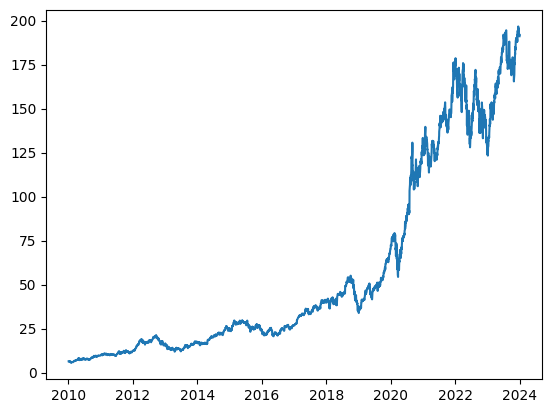

In [16]:
plt.plot(df)

# Cual es la tendencia de la data?

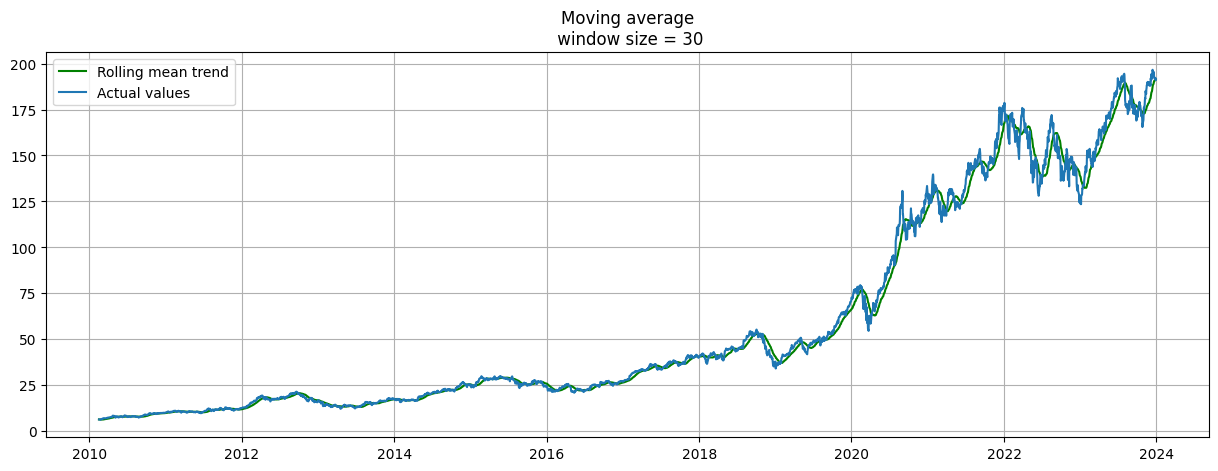

In [24]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mape = mean_absolute_percentage_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mape + scale * deviation)
        upper_bond = rolling_mean + (mape + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


plotMovingAverage(df, 30)


Iniciando validación cruzada con TimeSeriesSplit (5 splits)...

--- Fold 1/5 ---
  Tamaño Entrenamiento: 587 (Desde 2010-01-04 hasta 2012-05-01)
  Tamaño Prueba: 587 (Desde 2012-05-02 hasta 2014-09-02)
  SES - MAPE: 0.8861, RMSE: 17.07
  Holt (add) - MAPE: 0.4120, RMSE: 7.30

--- Fold 2/5 ---
  Tamaño Entrenamiento: 1174 (Desde 2010-01-04 hasta 2014-09-02)
  Tamaño Prueba: 587 (Desde 2014-09-03 hasta 2016-12-29)
  SES - MAPE: 0.2373, RMSE: 7.24


c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A 

  Holt (add) - MAPE: 0.1386, RMSE: 4.01

--- Fold 3/5 ---
  Tamaño Entrenamiento: 1761 (Desde 2010-01-04 hasta 2016-12-29)
  Tamaño Prueba: 587 (Desde 2016-12-30 hasta 2019-05-02)
  SES - MAPE: 0.2246, RMSE: 10.68
  Holt (add) - MAPE: 0.2329, RMSE: 11.06

--- Fold 4/5 ---
  Tamaño Entrenamiento: 2348 (Desde 2010-01-04 hasta 2019-05-02)
  Tamaño Prueba: 587 (Desde 2019-05-03 hasta 2021-08-30)


c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will r

  SES - MAPE: 0.2926, RMSE: 40.90
  Holt (add) - MAPE: 0.3400, RMSE: 47.26

--- Fold 5/5 ---
  Tamaño Entrenamiento: 2935 (Desde 2010-01-04 hasta 2021-08-30)
  Tamaño Prueba: 587 (Desde 2021-08-31 hasta 2023-12-29)


c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A 

  SES - MAPE: 0.4467, RMSE: 85.61
  Holt (add) - MAPE: 0.2161, RMSE: 39.01

--- Resultados de la Validación Cruzada ---
Suavizado Exponencial Simple (SES):
  MAPE por fold: [0.8861, 0.2373, 0.2246, 0.2926, 0.4467]
  MAPE Promedio: 0.4175 (Std: 0.2473)
  RMSE por fold: [np.float64(17.07), np.float64(7.24), np.float64(10.68), np.float64(40.9), np.float64(85.61)]
  RMSE Promedio: 32.30 (Std: 29.13)

Suavizado Exponencial Doble (Holt - Tendencia Aditiva):
  MAPE por fold: [0.412, 0.1386, 0.2329, 0.34, 0.2161]
  MAPE Promedio: 0.2679 (Std: 0.0965)
  RMSE por fold: [np.float64(7.3), np.float64(4.01), np.float64(11.06), np.float64(47.26), np.float64(39.01)]
  RMSE Promedio: 21.73 (Std: 17.81)

--- Visualización del Último Fold ---


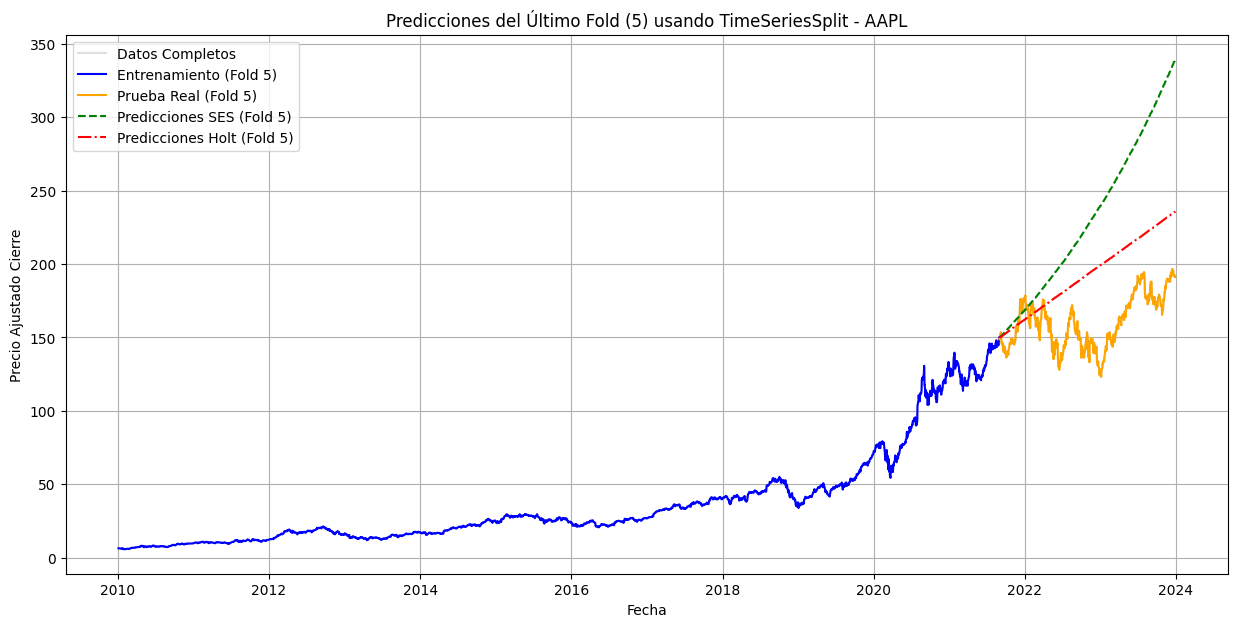

In [40]:
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

mape_scores_ses = []
rmse_scores_ses = []
# all_predictions_ses ya no es estrictamente necesario para la visualización del último fold
# si guardamos last_fold_predictions_ses_viz, pero puede ser útil para otros análisis.
# lo mismo para all_test_indices.

mape_scores_holt = []
rmse_scores_holt = []

# Variables para guardar los datos del último fold para visualización
last_fold_train_data_viz = None
last_fold_test_data_viz = None
last_fold_predictions_ses_viz = None
last_fold_predictions_holt_viz = None # Para Holt

print(f"\nIniciando validación cruzada con TimeSeriesSplit ({n_splits} splits)...")

X = serie_completa.values # Para obtener índices de tscv
y = serie_completa        # Serie original para entrenamiento/prueba

fold_counter = 0
for train_index, test_index in tscv.split(X): # ESTE ES EL BUCLE PRINCIPAL
    fold_counter += 1
    print(f"\n--- Fold {fold_counter}/{n_splits} ---")

    train_data_fold = y.iloc[train_index]
    test_data_fold = y.iloc[test_index]

    print(f"  Tamaño Entrenamiento: {len(train_data_fold)} (Desde {train_data_fold.index.min().date()} hasta {train_data_fold.index.max().date()})")
    print(f"  Tamaño Prueba: {len(test_data_fold)} (Desde {test_data_fold.index.min().date()} hasta {test_data_fold.index.max().date()})")

    # --- Modelo 1: Suavizado Exponencial Simple (SES) ---
    try:
        model_ses = ExponentialSmoothing(
            train_data_fold,
            trend = 'multiplicative',
            initialization_method="estimated"
        )
        fit_ses = model_ses.fit(optimized=True)
        predictions_ses_fold = fit_ses.forecast(steps=len(test_data_fold))
        predictions_ses_fold.index = test_data_fold.index

        mape_ses = mean_absolute_percentage_error(test_data_fold, predictions_ses_fold)
        rmse_ses = np.sqrt(mean_squared_error(test_data_fold, predictions_ses_fold))
        mape_scores_ses.append(mape_ses)
        rmse_scores_ses.append(rmse_ses)
        print(f"  SES - MAPE: {mape_ses:.4f}, RMSE: {rmse_ses:.2f}")

    except Exception as e:
        print(f"  Error ajustando SES en fold {fold_counter}: {e}")
        mape_scores_ses.append(np.nan)
        rmse_scores_ses.append(np.nan)
        predictions_ses_fold = None # Marcar como None si falla

    # --- Modelo 2: Suavizado Exponencial Doble (Holt - con tendencia aditiva) ---
    try:
        model_holt = ExponentialSmoothing(
            train_data_fold,
            trend="add",
            initialization_method="estimated"
        )
        fit_holt = model_holt.fit(optimized=True)
        predictions_holt_fold = fit_holt.forecast(steps=len(test_data_fold))
        predictions_holt_fold.index = test_data_fold.index

        mape_holt = mean_absolute_percentage_error(test_data_fold, predictions_holt_fold)
        rmse_holt = np.sqrt(mean_squared_error(test_data_fold, predictions_holt_fold))
        mape_scores_holt.append(mape_holt)
        rmse_scores_holt.append(rmse_holt)
        print(f"  Holt (add) - MAPE: {mape_holt:.4f}, RMSE: {rmse_holt:.2f}")

    except Exception as e:
        print(f"  Error ajustando Holt (add) en fold {fold_counter}: {e}")
        mape_scores_holt.append(np.nan)
        rmse_scores_holt.append(np.nan)
        predictions_holt_fold = None # Marcar como None si falla

    # Guardar los datos del ÚLTIMO fold para la visualización
    if fold_counter == n_splits:
        last_fold_train_data_viz = train_data_fold.copy()
        last_fold_test_data_viz = test_data_fold.copy()
        if predictions_ses_fold is not None: # Solo copiar si la predicción fue exitosa
            last_fold_predictions_ses_viz = predictions_ses_fold.copy()
        if predictions_holt_fold is not None: # Solo copiar si la predicción fue exitosa
            last_fold_predictions_holt_viz = predictions_holt_fold.copy()


# 3. Resultados de la Validación Cruzada
print("\n--- Resultados de la Validación Cruzada ---")
# (El código de impresión de resultados se mantiene igual)
print("Suavizado Exponencial Simple (SES):")
print(f"  MAPE por fold: {[round(score, 4) for score in mape_scores_ses if not np.isnan(score)]}")
print(f"  MAPE Promedio: {np.nanmean(mape_scores_ses):.4f} (Std: {np.nanstd(mape_scores_ses):.4f})")
print(f"  RMSE por fold: {[round(score, 2) for score in rmse_scores_ses if not np.isnan(score)]}")
print(f"  RMSE Promedio: {np.nanmean(rmse_scores_ses):.2f} (Std: {np.nanstd(rmse_scores_ses):.2f})")

print("\nSuavizado Exponencial Doble (Holt - Tendencia Aditiva):")
print(f"  MAPE por fold: {[round(score, 4) for score in mape_scores_holt if not np.isnan(score)]}")
print(f"  MAPE Promedio: {np.nanmean(mape_scores_holt):.4f} (Std: {np.nanstd(mape_scores_holt):.4f})")
print(f"  RMSE por fold: {[round(score, 2) for score in rmse_scores_holt if not np.isnan(score)]}")
print(f"  RMSE Promedio: {np.nanmean(rmse_scores_holt):.2f} (Std: {np.nanstd(rmse_scores_holt):.2f})")


# 4. Visualización (Graficar el último fold)
# ESTA SECCIÓN DEBE USAR LAS VARIABLES _viz
print("\n--- Visualización del Último Fold ---")
if last_fold_train_data_viz is not None and last_fold_test_data_viz is not None:
    plt.figure(figsize=(15, 7))
    plt.plot(serie_completa.index, serie_completa, label='Datos Completos', color='lightgray', alpha=0.7) # Contexto

    plt.plot(last_fold_train_data_viz.index, last_fold_train_data_viz, label=f'Entrenamiento (Fold {n_splits})', color='blue')
    plt.plot(last_fold_test_data_viz.index, last_fold_test_data_viz, label=f'Prueba Real (Fold {n_splits})', color='orange')

    if last_fold_predictions_ses_viz is not None:
        plt.plot(last_fold_predictions_ses_viz.index, last_fold_predictions_ses_viz, label=f'Predicciones SES (Fold {n_splits})', color='green', linestyle='--')
    
    if last_fold_predictions_holt_viz is not None:
        plt.plot(last_fold_predictions_holt_viz.index, last_fold_predictions_holt_viz, label=f'Predicciones Holt (Fold {n_splits})', color='red', linestyle='-.')

    plt.title(f'Predicciones del Último Fold ({n_splits}) usando TimeSeriesSplit - {ticker_symbol}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Ajustado Cierre')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
else:
    print("\nNo se pudieron graficar los datos del último fold (posiblemente no se completaron todos los folds o hubo errores en las predicciones).")

porquería, modelo no sirvió

# Estacionalidad de la Serie

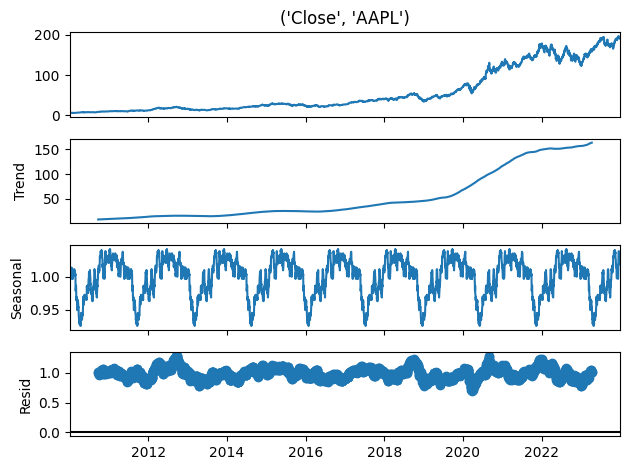

In [48]:
decomposition = seasonal_decompose(df, model='multiplicative', period=365)
decomposition.plot()
plt.tight_layout()
plt.show()

Se puede ver claramente una tendencia multiplicativa y una estacionalidad clara en el df.

# Diferenciación y Log

In [52]:
def check_stationarity(timeseries, window=21, title_prefix=""): # window para media móvil más corta
    # Determinar media y varianza móvil
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Graficar estadísticas móviles:
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Media Móvil')
    plt.plot(rolstd, color='black', label = 'Desviación Estándar Móvil')
    plt.legend(loc='best')
    plt.title(f'{title_prefix} - Estadísticas Móviles')
    plt.show(block=False)

    # Realizar el Test de Dickey-Fuller:
    print(f'\nResultados del Test de Dickey-Fuller para {title_prefix}:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC') # Usar dropna() por si hay NaNs
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("Resultado: La serie es ESTACIONARIA (se rechaza la hipótesis nula)")
    else:
        print("Resultado: La serie NO es ESTACIONARIA (no se rechaza la hipótesis nula)")

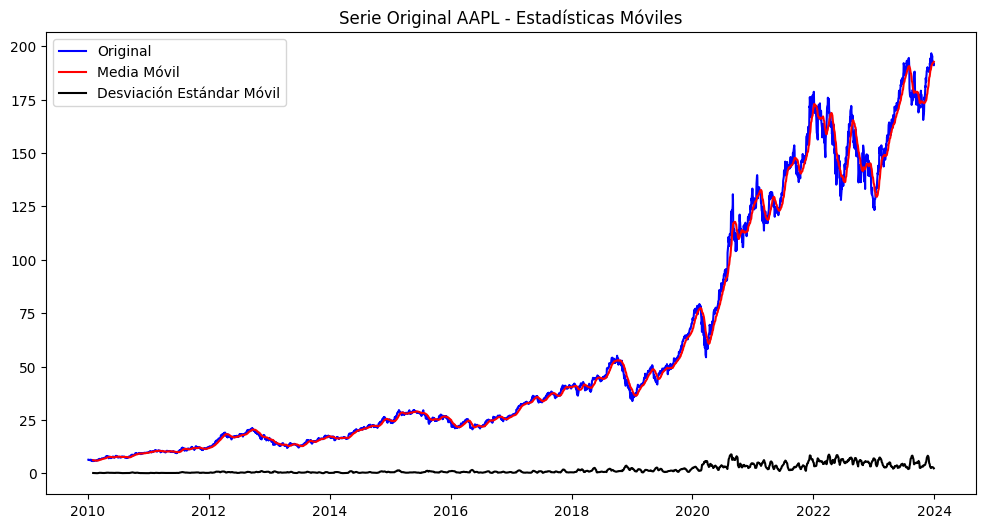


Resultados del Test de Dickey-Fuller para Serie Original AAPL:
Test Statistic                    0.920971
p-value                           0.993358
#Lags Used                       18.000000
Number of Observations Used    3503.000000
Critical Value (1%)              -3.432218
Critical Value (5%)              -2.862365
Critical Value (10%)             -2.567209
dtype: float64
Resultado: La serie NO es ESTACIONARIA (no se rechaza la hipótesis nula)


<Figure size 1200x300 with 0 Axes>

In [56]:
check_stationarity(df, title_prefix="Serie Original AAPL")
plt.figure(figsize=(12,3))
#plot_acf(df.dropna(), lags=40, title="ACF Serie Original AAPL")
plt.show()



--- Aplicando Transformación Logarítmica ---


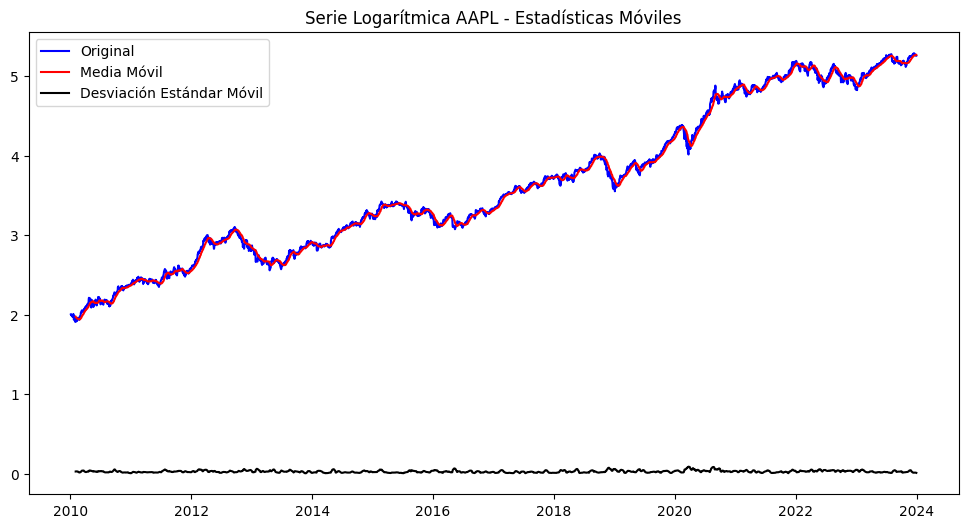


Resultados del Test de Dickey-Fuller para Serie Logarítmica AAPL:
Test Statistic                   -0.732501
p-value                           0.838150
#Lags Used                       22.000000
Number of Observations Used    3499.000000
Critical Value (1%)              -3.432220
Critical Value (5%)              -2.862366
Critical Value (10%)             -2.567210
dtype: float64
Resultado: La serie NO es ESTACIONARIA (no se rechaza la hipótesis nula)


<Figure size 1200x300 with 0 Axes>

In [55]:
df1 = df.copy()
df1_log = np.log1p(df1)
print("\n--- Aplicando Transformación Logarítmica ---")
check_stationarity(df1_log, title_prefix="Serie Logarítmica AAPL")
plt.figure(figsize=(12,3))
#plot_acf(df1_log.dropna(), lags=40, title="ACF Serie Logarítmica AAPL")
plt.show()

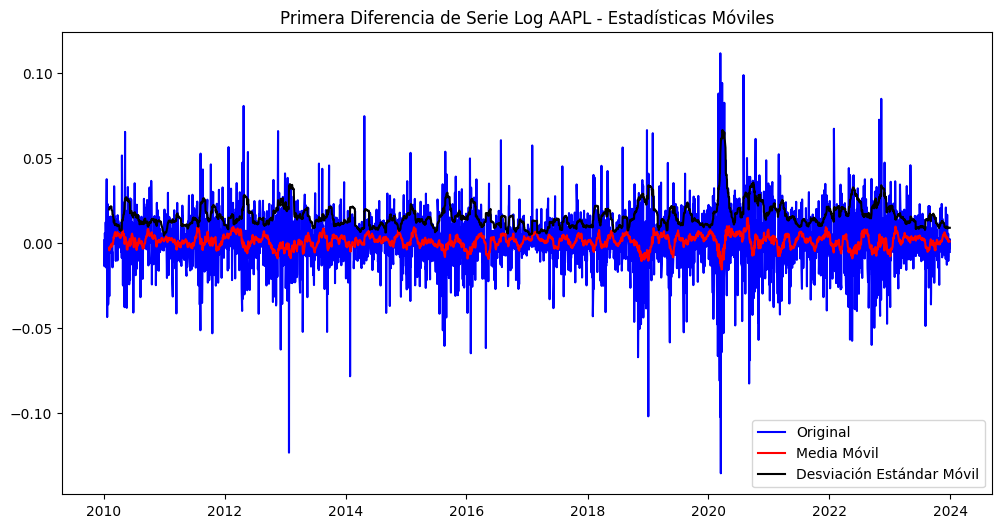


Resultados del Test de Dickey-Fuller para Primera Diferencia de Serie Log AAPL:
Test Statistic                -1.222084e+01
p-value                        1.108244e-22
#Lags Used                     2.100000e+01
Number of Observations Used    3.499000e+03
Critical Value (1%)           -3.432220e+00
Critical Value (5%)           -2.862366e+00
Critical Value (10%)          -2.567210e+00
dtype: float64
Resultado: La serie es ESTACIONARIA (se rechaza la hipótesis nula)


<Figure size 1200x600 with 0 Axes>

In [ ]:
serie_diff_log = df1_log
serie_diff = serie_diff_log.diff(1).dropna()
check_stationarity(serie_diff, title_prefix="Primera Diferencia de Serie Log AAPL")
plt.figure(figsize=(12,6))
#plt.subplot(211)
#plot_acf(serie_diff.dropna(), lags=40, ax=plt.gca(), title="ACF Primera Diferencia")
#plt.subplot(212)
#plot_pacf(serie_diff.dropna(), lags=40, ax=plt.gca(), title="PACF Primera Diferencia", method='ywm') # 'ywm' es común
plt.tight_layout()
plt.show()

 En caso de que no sea estacional después de log y diff, se pudiese aplicar otra diferenciación igual a la anterior. Una vez  se logra Estacionalidad, se puede aplicar modelos AR, MA, ARIMA y SARIMAX

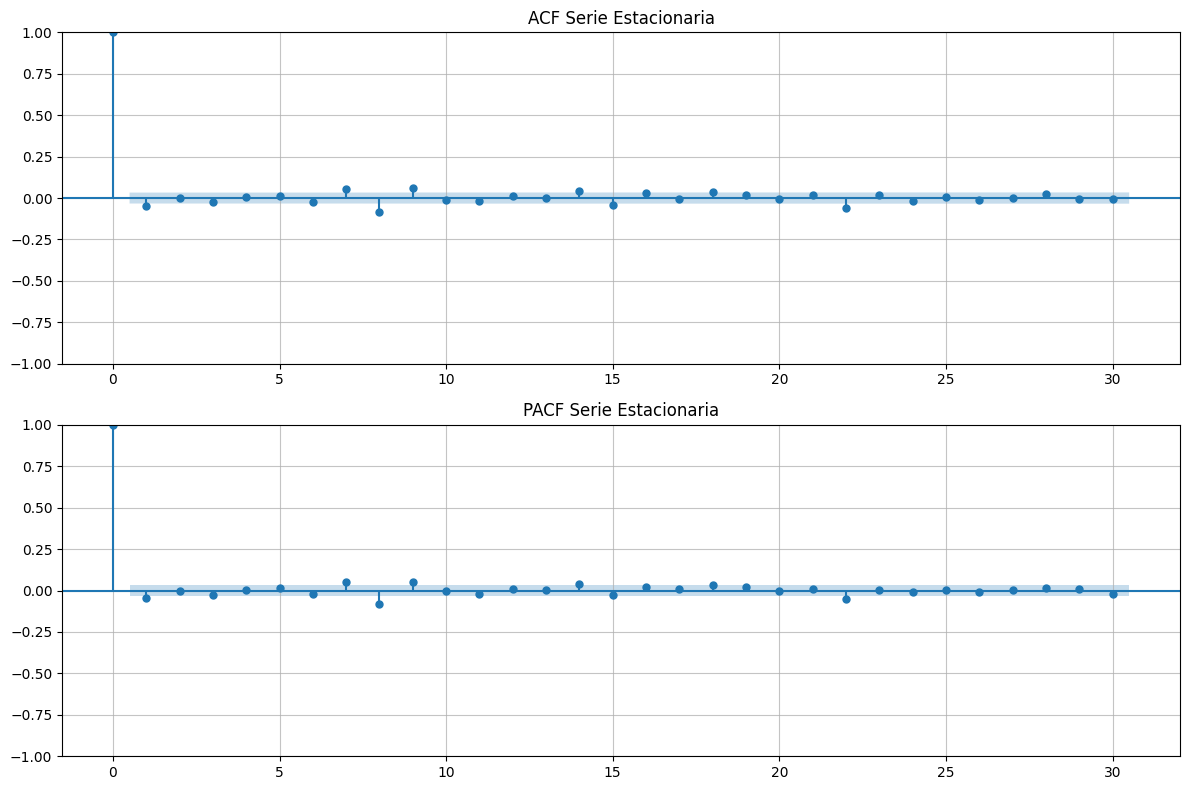

In [62]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(serie_diff.dropna(), lags=30, ax=plt.gca(), title="ACF Serie Estacionaria")
plt.grid(alpha = 0.75)
plt.subplot(212)

plot_pacf(serie_diff.dropna(), lags=30, ax=plt.gca(), title="PACF Serie Estacionaria", method='ywm') # 'ywm' o 'ols'
plt.tight_layout()
plt.grid(alpha = 0.75)
plt.show()

C:\Users\javie\AppData\Local\Temp\ipykernel_14236\2141628549.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.asfreq('B').fillna(method='ffill').fillna(method='bfill')
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Índice de df (original con freq 'B'): datetime64, Frecuencia: <BusinessDay>, Longitud: 3650

--- Aplicando Transformación Logarítmica (log1p) ---

--- Aplicando Primera Diferenciación ---
Índice de serie_diff: datetime64, Frecuencia: <BusinessDay>, Longitud: 3649
Iniciando validación cruzada para ARIMA(1,0,1) sobre serie diferenciada...

--- Fold 1/5 ---
  Tamaño Entrenamiento (diferenciado): 609, Freq: <BusinessDay>
  Tamaño Validación (diferenciado): 608, Freq: <BusinessDay>
  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: nan, RMSE: 0.0156
  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: 0.6907

--- Fold 2/5 ---
  Tamaño Entrenamiento (diferenciado): 1217, Freq: <BusinessDay>
  Tamaño Validación (diferenciado): 608, Freq: <BusinessDay>


c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: nan, RMSE: 0.0146
  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: 0.2432

--- Fold 3/5 ---
  Tamaño Entrenamiento (diferenciado): 1825, Freq: <BusinessDay>
  Tamaño Validación (diferenciado): 608, Freq: <BusinessDay>


c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\javie\OneDrive\Escritorio\prueba123\PruebaSerieTemp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: nan, RMSE: 0.0150
  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: 0.1612

--- Fold 4/5 ---
  Tamaño Entrenamiento (diferenciado): 2433, Freq: <BusinessDay>
  Tamaño Validación (diferenciado): 608, Freq: <BusinessDay>
  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: nan, RMSE: 0.0220
  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: 0.2638

--- Fold 5/5 ---
  Tamaño Entrenamiento (diferenciado): 3041, Freq: <BusinessDay>
  Tamaño Validación (diferenciado): 608, Freq: <BusinessDay>
  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: nan, RMSE: 0.0174
  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: 0.2854

--- Resultados Finales de Validación Cruzada ---
Sobre Serie Diferenciada:
  ARIMA(1,0,1) - MAPE Promedio: N/A (No hay scores válidos)
  ARIMA(1,0,1) - RMSE Promedio: 0.02 (Std: 0.00)

Sobre Serie Original Reconstruida:
  ARIMA(1,0,1) - MAPE Promedio: 0.3289 (Std: 0.1858)


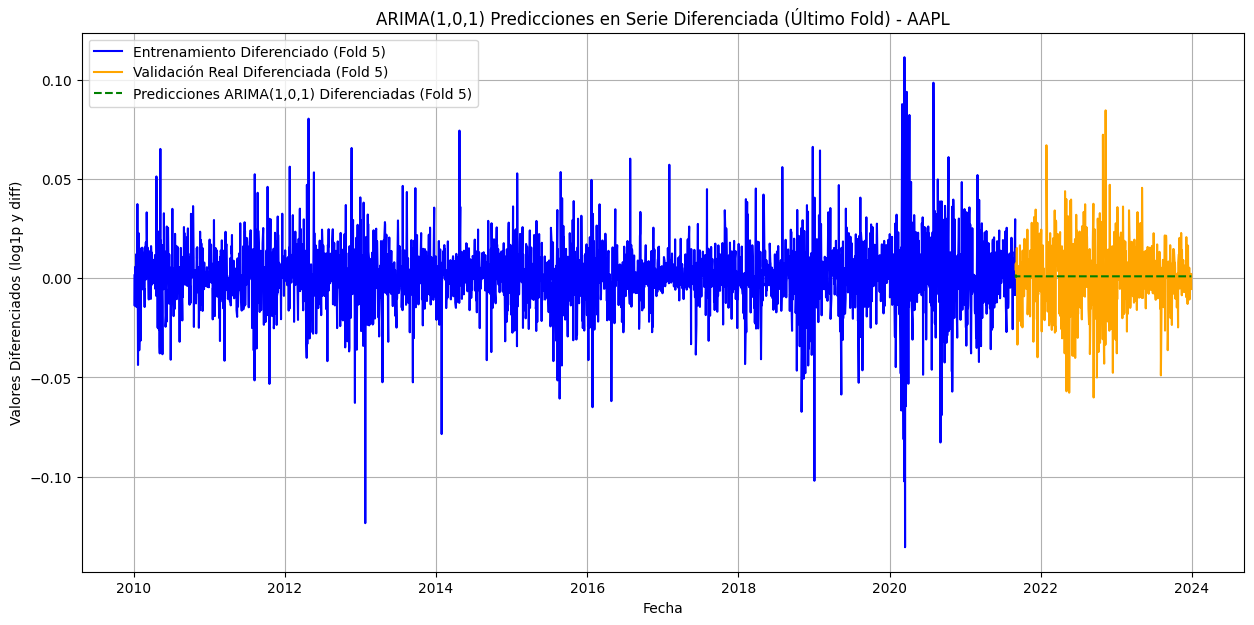

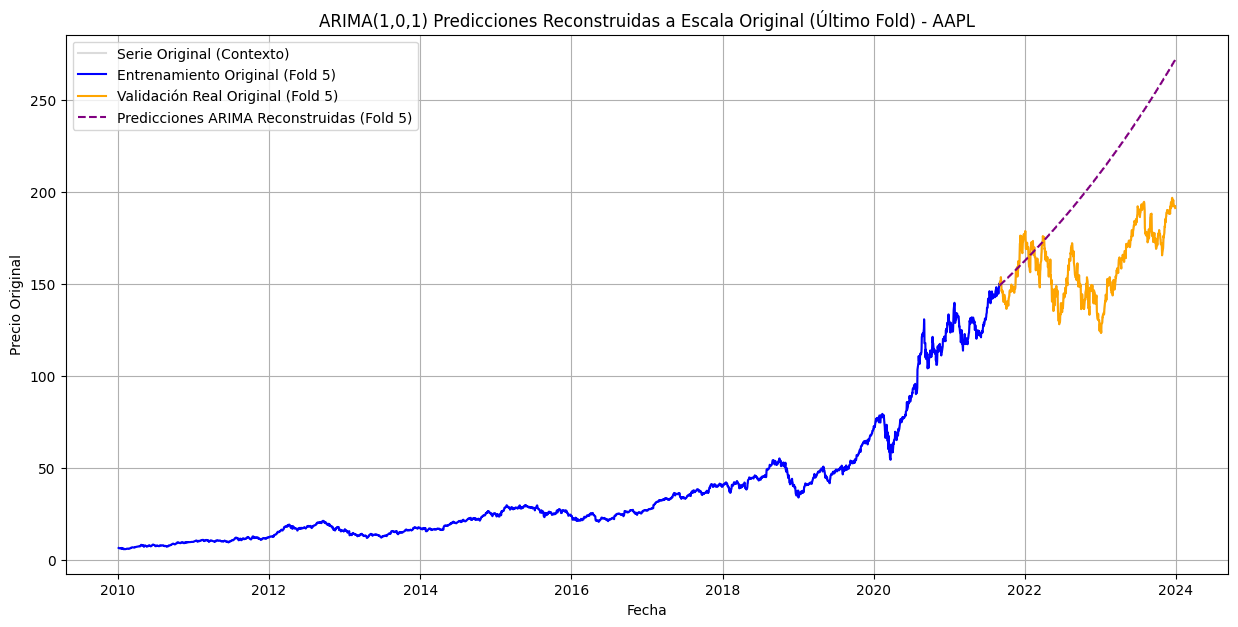

In [74]:
df = df.copy()
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Forzar a BusinessDay y rellenar. Esto es crucial para la consistencia.
df = df.asfreq('B').fillna(method='ffill').fillna(method='bfill')
print(f"Índice de df (original con freq 'B'): {df.index.inferred_type}, Frecuencia: {df.index.freq}, Longitud: {len(df)}")


# 2. Aplicar transformaciones
df1_for_log_and_diff = df.copy() # Esta es la base para log y diff
df1_log = np.log1p(df1_for_log_and_diff)
print("\n--- Aplicando Transformación Logarítmica (log1p) ---")

serie_diff = df1_log.diff(1).dropna()
print("\n--- Aplicando Primera Diferenciación ---")

# Asegurar que serie_diff mantenga la frecuencia 'B'
if serie_diff.index.freq is None:
    print("Re-estableciendo frecuencia 'B' para serie_diff")
    serie_diff = serie_diff.asfreq('B').fillna(method='ffill').fillna(method='bfill')

print(f"Índice de serie_diff: {serie_diff.index.inferred_type}, Frecuencia: {serie_diff.index.freq}, Longitud: {len(serie_diff)}")
# --- Fin de Tus Scripts de Transformación ---


mape_scores_arima_diff = []
rmse_scores_arima_diff = []
mape_scores_arima_original = []

cvts = TimeSeriesSplit(n_splits=5)
X_indices_for_split = serie_diff.index # Usar el índice para el split
y_data_for_model = serie_diff

last_fold_train_data_diff_viz = None
last_fold_validation_data_diff_viz = None
last_fold_predictions_diff_viz = None
last_fold_reconstructed_original_preds_viz = None
last_fold_original_validation_values_viz = None
last_fold_original_train_values_viz = None

print("Iniciando validación cruzada para ARIMA(1,0,1) sobre serie diferenciada...")
fold_counter = 0
# Usar .split(y_data_for_model) directamente si es una Serie/DataFrame de Pandas
for train_idx_loc, val_idx_loc in cvts.split(y_data_for_model): # Estos son índices posicionales
    fold_counter += 1
    print(f"\n--- Fold {fold_counter}/{cvts.get_n_splits()} ---")
    
    # Obtener los datos usando los índices posicionales en la serie 'y_data_for_model'
    train_data_fold_diff = y_data_for_model.iloc[train_idx_loc]
    validation_data_fold_diff = y_data_for_model.iloc[val_idx_loc]

    # No es necesario re-aplicar asfreq aquí si y_data_for_model ya tiene la frecuencia correcta
    # y los slices se hacen con iloc. El índice se hereda.
    
    print(f"  Tamaño Entrenamiento (diferenciado): {len(train_data_fold_diff)}, Freq: {train_data_fold_diff.index.freq}")
    print(f"  Tamaño Validación (diferenciado): {len(validation_data_fold_diff)}, Freq: {validation_data_fold_diff.index.freq}")

    if fold_counter == cvts.get_n_splits():
        last_fold_train_data_diff_viz = train_data_fold_diff.copy()
        last_fold_validation_data_diff_viz = validation_data_fold_diff.copy()

    try:
        model_arima = ARIMA(train_data_fold_diff, order=(1,0,1))
        model_arima_fit = model_arima.fit()
        preds_out_fold_diff_raw = model_arima_fit.forecast(steps=len(validation_data_fold_diff))
        # Asegurar que el índice de predicción sea el de validación
        preds_out_fold_diff = pd.Series(preds_out_fold_diff_raw, index=validation_data_fold_diff.index)


        if fold_counter == cvts.get_n_splits():
            last_fold_predictions_diff_viz = preds_out_fold_diff.copy()

        valid_val_diff = validation_data_fold_diff.dropna()
        if valid_val_diff.empty:
            mape_arima_fold_diff, rmse_arima_fold_diff = np.nan, np.nan
        else:
            preds_aligned_diff = preds_out_fold_diff.loc[valid_val_diff.index]
            if np.any(valid_val_diff == 0): mape_arima_fold_diff = np.nan
            else: mape_arima_fold_diff = mean_absolute_percentage_error(valid_val_diff, preds_aligned_diff)
            rmse_arima_fold_diff = np.sqrt(mean_squared_error(valid_val_diff, preds_aligned_diff))
        mape_scores_arima_diff.append(mape_arima_fold_diff)
        rmse_scores_arima_diff.append(rmse_arima_fold_diff)
        print(f"  ARIMA(1,0,1) - Sobre Serie Diferenciada - MAPE: {mape_arima_fold_diff:.4f}, RMSE: {rmse_arima_fold_diff:.4f}")

        # --- Revertir Transformaciones ---
        # El índice de validation_data_fold_diff son fechas de negocio válidas en serie_diff
        first_val_date_in_diff_series = validation_data_fold_diff.index[0]

        # Encontrar el índice posicional correspondiente en df1_log (que también tiene freq 'B')
        # Esto debería funcionar si ambos tienen el mismo índice base de días laborables.
        loc_of_first_val_date_in_df1_log = df1_log.index.get_loc(first_val_date_in_diff_series)
        
        if loc_of_first_val_date_in_df1_log == 0:
             print(f"  Advertencia reconstrucción Fold {fold_counter}: No hay valor previo en df1_log para {first_val_date_in_diff_series}.")
             raise ValueError("No hay valor previo para reconstrucción.")
        # El valor logarítmico t-1 es el que está en la posición anterior en df1_log
        last_log_value_before_val_period = df1_log.iloc[loc_of_first_val_date_in_df1_log - 1]
        
        reconstructed_log_preds = last_log_value_before_val_period + preds_out_fold_diff.cumsum()
        reconstructed_original_preds = np.expm1(reconstructed_log_preds)
        reconstructed_original_preds.name = "Predicciones_Original"

        # Los índices de validation_data_fold_diff son los que queremos para la serie original 'df'
        original_validation_values = df.loc[validation_data_fold_diff.index]
        original_validation_values.name = "Reales_Original"

        valid_orig_val = original_validation_values.dropna()
        if valid_orig_val.empty:
            mape_arima_fold_original = np.nan
        else:
            preds_aligned_orig = reconstructed_original_preds.loc[valid_orig_val.index]
            if np.any(valid_orig_val == 0): mape_arima_fold_original = np.nan
            else: mape_arima_fold_original = mean_absolute_percentage_error(valid_orig_val, preds_aligned_orig)
        mape_scores_arima_original.append(mape_arima_fold_original)
        print(f"  ARIMA(1,0,1) - Sobre Serie Original Reconstruida - MAPE: {mape_arima_fold_original:.4f}")

        if fold_counter == cvts.get_n_splits():
            last_fold_reconstructed_original_preds_viz = reconstructed_original_preds.copy()
            last_fold_original_validation_values_viz = original_validation_values.copy()
            # Para last_fold_original_train_values_viz, usar el índice de train_data_fold_diff
            # para seleccionar de 'df' (la original ya con freq 'B')
            last_fold_original_train_values_viz = df.loc[train_data_fold_diff.index].copy()

    except KeyError as ke:
        print(f"  Error de KeyError en Fold {fold_counter} durante la reconstrucción: {ke}. Fechas problemáticas podrían estar en el índice de validación.")
        mape_scores_arima_diff.append(np.nan) # Asegurar que se registra si falla antes
        rmse_scores_arima_diff.append(np.nan)
        mape_scores_arima_original.append(np.nan)
    except Exception as e:
        print(f"  Otro Error en Fold {fold_counter}: {e}")
        # mape_scores_arima_diff ya se habría añadido o no, dependiendo de dónde ocurrió el error.
        # Si el error es DESPUÉS del cálculo de diff_metrics, no necesitas añadir NaNs de nuevo.
        # Si es ANTES, sí. Por seguridad, podemos añadirlo si aún no está.
        if len(mape_scores_arima_diff) < fold_counter: mape_scores_arima_diff.append(np.nan)
        if len(rmse_scores_arima_diff) < fold_counter: rmse_scores_arima_diff.append(np.nan)
        mape_scores_arima_original.append(np.nan)
        if fold_counter == cvts.get_n_splits():
            last_fold_predictions_diff_viz = None
            last_fold_reconstructed_original_preds_viz = None


# --- (Resto del código para imprimir resultados y graficar se mantiene igual) ---
# (Asegúrate de que los FutureWarnings de fillna se actualicen a .ffill() o .bfill() donde sea necesario si actualizas Pandas)

print("\n--- Resultados Finales de Validación Cruzada ---")
print("Sobre Serie Diferenciada:")
if not mape_scores_arima_diff or all(np.isnan(s) for s in mape_scores_arima_diff): # Modificado para verificar lista vacía
    print("  ARIMA(1,0,1) - MAPE Promedio: N/A (No hay scores válidos)")
else:
    print(f"  ARIMA(1,0,1) - MAPE Promedio: {np.nanmean(mape_scores_arima_diff):.4f} (Std: {np.nanstd(mape_scores_arima_diff):.4f})")

if not rmse_scores_arima_diff or all(np.isnan(s) for s in rmse_scores_arima_diff): # Modificado
    print(f"  ARIMA(1,0,1) - RMSE Promedio: N/A (No hay scores válidos)")
else:
    print(f"  ARIMA(1,0,1) - RMSE Promedio: {np.nanmean(rmse_scores_arima_diff):.2f} (Std: {np.nanstd(rmse_scores_arima_diff):.2f})")


print("\nSobre Serie Original Reconstruida:")
if not mape_scores_arima_original or all(np.isnan(s) for s in mape_scores_arima_original): # Modificado
     print("  ARIMA(1,0,1) - MAPE Promedio: N/A (No hay scores válidos)")
else:
    print(f"  ARIMA(1,0,1) - MAPE Promedio: {np.nanmean(mape_scores_arima_original):.4f} (Std: {np.nanstd(mape_scores_arima_original):.4f})")


# --- Visualización de las Predicciones del Último Fold (sobre serie diferenciada) ---
if last_fold_train_data_diff_viz is not None and \
   last_fold_validation_data_diff_viz is not None and \
   last_fold_predictions_diff_viz is not None:

    plt.figure(figsize=(15, 7))
    plt.plot(last_fold_train_data_diff_viz.index, last_fold_train_data_diff_viz, label=f'Entrenamiento Diferenciado (Fold {fold_counter})', color='blue')
    plt.plot(last_fold_validation_data_diff_viz.index, last_fold_validation_data_diff_viz, label=f'Validación Real Diferenciada (Fold {fold_counter})', color='orange')
    plt.plot(last_fold_predictions_diff_viz.index, last_fold_predictions_diff_viz, label=f'Predicciones ARIMA(1,0,1) Diferenciadas (Fold {fold_counter})', color='green', linestyle='--')
    plt.title(f'ARIMA(1,0,1) Predicciones en Serie Diferenciada (Último Fold) - {ticker_symbol}')
    plt.xlabel('Fecha')
    plt.ylabel('Valores Diferenciados (log1p y diff)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# --- Visualización de las Predicciones del Último Fold (RECONSTRUIDAS a escala original) ---
if last_fold_reconstructed_original_preds_viz is not None and \
   last_fold_original_validation_values_viz is not None and \
   last_fold_original_train_values_viz is not None:

    plt.figure(figsize=(15, 7))
    # Usar 'df' (original con freq 'B') para el contexto
    context_start_date = last_fold_original_train_values_viz.index.min() - pd.Timedelta(days=90) # Más contexto
    context_end_date = last_fold_original_validation_values_viz.index.max() + pd.Timedelta(days=30)
    
    context_series = df[
        (df.index >= context_start_date) &
        (df.index <= context_end_date)
    ]
    if not context_series.empty:
        plt.plot(context_series.index, context_series, label='Serie Original (Contexto)', color='lightgray', alpha=0.8)

    plt.plot(last_fold_original_train_values_viz.index, last_fold_original_train_values_viz, label=f'Entrenamiento Original (Fold {fold_counter})', color='blue')
    plt.plot(last_fold_original_validation_values_viz.index, last_fold_original_validation_values_viz, label=f'Validación Real Original (Fold {fold_counter})', color='orange')
    plt.plot(last_fold_reconstructed_original_preds_viz.index, last_fold_reconstructed_original_preds_viz, label=f'Predicciones ARIMA Reconstruidas (Fold {fold_counter})', color='purple', linestyle='--')
    
    plt.title(f'ARIMA(1,0,1) Predicciones Reconstruidas a Escala Original (Último Fold) - {ticker_symbol}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Original')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
else:
    print("\nNo se pudieron graficar los datos reconstruidos del último fold.")
    ticker_symbol = "AAPL"
    plt.title(f'ARIMA(1,0,1) Predicciones Reconstruidas a Escala Original (Último Fold) - {ticker_symbol}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Original')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [ ]:
#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#1.-What-was-the-change-in-price-of-the-stock-overtime?